<a href="https://colab.research.google.com/github/MaLuisa7/data_processing_and_classification_MasterDS/blob/main/Practica5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

preprocesamiento de los datos

## Funciones

In [1]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

## Librerias

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [5]:
#important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
np.set_printoptions(threshold=np.inf)

%matplotlib inline
import seaborn as sns
import string
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score,roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import multiprocessing
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

#tensorflow y keras
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

from keras import layers
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
from keras.models import Model,Sequential
from keras.layers import Input,  Embedding, Bidirectional, LSTM, Dense, Dropout, Concatenate, Multiply, Activation, Lambda,SpatialDropout1D
tf.config.experimental.list_physical_devices()
tf.test.is_built_with_cuda()

#nlp
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

#idk
from collections import Counter
from tqdm import trange
from concurrent.futures import ProcessPoolExecutor
import bz2
import re
import os

#drive

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mounted at /content/drive


## Data reading

In [3]:
path_root = "/content/drive/MyDrive/procesamiento_clasificacion_datos/"

In [6]:
data = pd.read_csv(path_root + "data_con_stopwords_20231005.csv")
data_prep = pd.read_csv(path_root + 'resultados_20231014.csv')

In [7]:
dict(zip(['x',  'text_12', 'text_stemmed', 'text_lemm'],['str']*4))

{'x': 'str', 'text_12': 'str', 'text_stemmed': 'str', 'text_lemm': 'str'}

In [13]:
df

,x,y,text_12,text_stemmed,text_lemm
0,Stuning even for the non-gamer: This sound tra...,1,stuning even for the nongamer this sound track...,stune even nongam sound track beauti paint sen...,stuning even nongamer sound track beautiful pa...
1,The best soundtrack ever to anything.: I'm rea...,1,the best soundtrack ever to anything im readin...,best soundtrack ever anyth im read lot review ...,best soundtrack ever anything im reading lot r...
2,Amazing!: This soundtrack is my favorite music...,1,amazing this soundtrack is my favorite music o...,amaz soundtrack favorit music time hand intens...,amazing soundtrack favorite music time hand in...
3,Excellent Soundtrack: I truly like this soundt...,1,excellent soundtrack i truly like this soundtr...,excel soundtrack truli like soundtrack enjoy v...,excellent soundtrack truly like soundtrack enj...
4,"Remember, Pull Your Jaw Off The Floor After He...",1,remember pull your jaw off the floor after hea...,rememb pull jaw floor hear youv play game know...,remember pull jaw floor hearing youve played g...
...,...,...,...,...,...
999996,"Quality lens: Very good quality lens, feels so...",1,quality lens very good quality lens feels soli...,qualiti len good qualiti len feel solid pictur...,quality lens good quality lens feel solid pict...
999997,Haven't used it enough.: Haven't used it enoug...,1,havent used it enough havent used it enough to...,havent use enough havent use enough make infor...,havent used enough havent used enough make inf...
999998,Canon L Lens at its Best: Got this lens with m...,1,canon l lens at its best got this lens with my...,canon l len best got len canon 5d mark ii impr...,canon l lens best got lens canon 5d mark ii im...
999999,Great lens: I've had this lens for 2 months no...,1,great lens ive had this lens for 2 months now ...,great len ive len 2 month love first l len see...,great lens ive lens 2 month love first l lens ...


In [14]:
len_sample = int(1e5)
df = pd.concat([data, data_prep] , axis =1 )
df = df.loc[:len_sample, ['x','y', 'text_12', 'text_stemmed', 'text_lemm']]
df['x'] = df['x'].astype('str')
df['text_12'] = df['text_12'].astype('str')
df['text_stemmed'] = df['text_stemmed'].astype('str')
df['text_lemm'] = df['text_lemm'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   x             100001 non-null  object
 1   y             100001 non-null  int64 
 2   text_12       100001 non-null  object
 3   text_stemmed  100001 non-null  object
 4   text_lemm     100001 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


## vars

In [9]:
X=df.text_stemmed.str.lower() # df.text_stemmed.astype('str').str.lower()
y=df.y

In [11]:
len(X)

1000001

## preprocesamiento

In [10]:
max_len = 10
tokenizer = Tokenizer(num_words=50)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
print(sequences_matrix.shape)

(1000001, 10)


## split train test

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape, Y_test.shape, Y_train.shape)

(800000, 10) (200001, 10) (200001,) (800000,)


## model

In [17]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

803503

In [18]:
embedding_dim=50
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
      output_dim=embedding_dim,
      input_length=max_len))
model.add(layers.LSTM(units=50,return_sequences=True))
model.add(layers.LSTM(units=10))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8))
model.add(layers.Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy",
     metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 50)            40175150  
                                                                 
 lstm (LSTM)                 (None, 10, 50)            20200     
                                                                 
 lstm_1 (LSTM)               (None, 10)                2440      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 8)                 88        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 40,197,887
Trainable params: 40,197,887
No

In [19]:
X_test.shape, X_train.shape

((200001, 10), (800000, 10))

In [25]:

lr_reduce = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=3, verbose=0, mode='auto',min_lr=0.0001)

history2 = model.fit(X_train,Y_train, epochs=10, batch_size=1000, verbose=True,

                     validation_data=(X_test, Y_test),
                     callbacks=[lr_reduce])

Epoch 1/10
800/800 [==============================] - 866s 1s/step - loss: 0.5827 - accuracy: 0.6953 - val_loss: 0.5725 - val_accuracy: 0.6959 - lr: 0.0010
Epoch 2/10
800/800 [==============================] - 858s 1s/step - loss: 0.5804 - accuracy: 0.6973 - val_loss: 0.5703 - val_accuracy: 0.6981 - lr: 0.0010
Epoch 3/10
800/800 [==============================] - 861s 1s/step - loss: 0.5778 - accuracy: 0.6991 - val_loss: 0.5688 - val_accuracy: 0.6997 - lr: 0.0010
Epoch 4/10
800/800 [==============================] - 856s 1s/step - loss: 0.5769 - accuracy: 0.7001 - val_loss: 0.5684 - val_accuracy: 0.7007 - lr: 0.0010
Epoch 5/10
800/800 [==============================] - 857s 1s/step - loss: 0.5754 - accuracy: 0.7010 - val_loss: 0.5670 - val_accuracy: 0.7017 - lr: 0.0010
Epoch 6/10
800/800 [==============================] - 856s 1s/step - loss: 0.5748 - accuracy: 0.7018 - val_loss: 0.5659 - val_accuracy: 0.7020 - lr: 0.0010
Epoch 7/10
800/800 [==============================] - 856s 1s/st

## evaluation

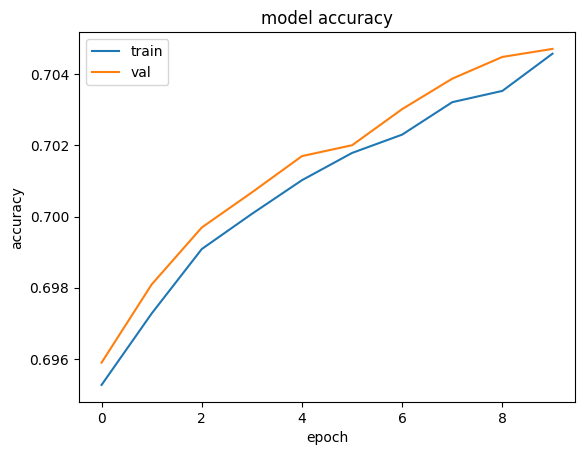

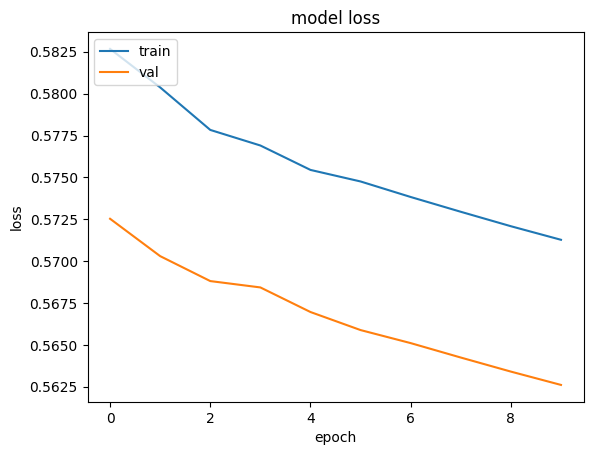

In [26]:
historia = history2
plt.plot(historia.history['accuracy'])
plt.plot(historia.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(historia.history['loss'])
plt.plot(historia.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
y_pred = model.predict(X_test)

6251/6251 [==============================] - 30s 5ms/step


In [28]:
accr1 = model.evaluate(X_test,Y_test)#loss y accuracy
auc_score=roc_auc_score(Y_test,y_pred)
fpr , tpr , thresholds = roc_curve ( Y_test , y_pred)
print(f'auc_score: {auc_score}, accr1: {accr1}')

6251/6251 [==============================] - 31s 5ms/step - loss: 0.5626 - accuracy: 0.7047
auc_score: 0.7786793939668117, accr1: [0.562610924243927, 0.7047064900398254]


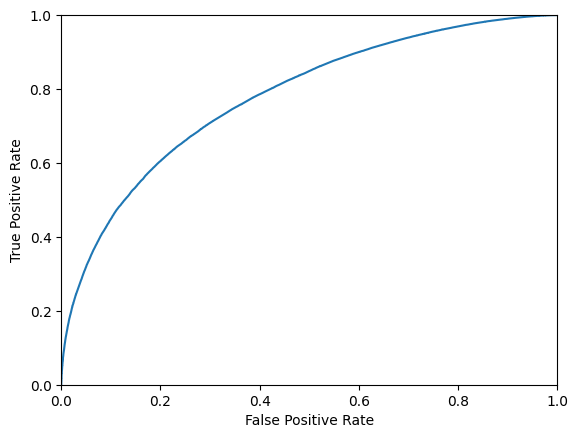

In [29]:
plot_roc_curve (fpr,tpr)